# Assignment 2

## Question 1

In [72]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [25]:
data = pd.read_csv("/Users/jonathan/Library/Mobile Documents/com~apple~CloudDocs/Master/2_Semester/ML/Assignments/machine_learning/Assignment_2/data.csv")


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10000 non-null  object
 1   Addthis        10000 non-null  int64 
 2   Bebo           10000 non-null  int64 
 3   Blogcatalog    10000 non-null  int64 
 4   Blogger        10000 non-null  int64 
 5   Buddymedia     10000 non-null  int64 
 6   Cnet           10000 non-null  int64 
 7   Conduit        10000 non-null  int64 
 8   Customerlobby  10000 non-null  int64 
 9   Delicious      10000 non-null  int64 
 10  Digg           10000 non-null  int64 
 11  Diigo          10000 non-null  object
 12  Docs           10000 non-null  int64 
 13  Docstoc        10000 non-null  int64 
 14  Download       10000 non-null  int64 
 15  Dropbox        10000 non-null  int64 
 16  Drupal         10000 non-null  int64 
 17  Epinions       10000 non-null  int64 
 18  Evernote       10000 non-nu

In [33]:
data['Diigo']


0                            0
1                            0
2                            0
3       Error: value not found
4                            0
                 ...          
9995                         0
9996                         0
9997                         0
9998                         0
9999                         0
Name: Diigo, Length: 10000, dtype: object

In [34]:
#split the data
#drop Diigo as column has bad data quality, contains "Error: value not found" several timey
X = data.drop(['Unnamed: 0','Click','Diigo'], axis=1)
Y = data['Click']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

print("X - Training Data Shape:", X_train.shape)
print("X - Testing Data Shape:", X_test.shape)

X - Training Data Shape: (8000, 80)
X - Testing Data Shape: (2000, 80)


### 1.1 Support Vector Machine

accuracy_score: 0.951 

Classifiaction Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1683
           1       0.96      0.72      0.82       317

    accuracy                           0.95      2000
   macro avg       0.95      0.86      0.90      2000
weighted avg       0.95      0.95      0.95      2000

Cross validation train_score 0.9614687500000001
Cross validation test_score [0.95875  0.955625 0.959375 0.949375 0.951875]

Confusion Matrix



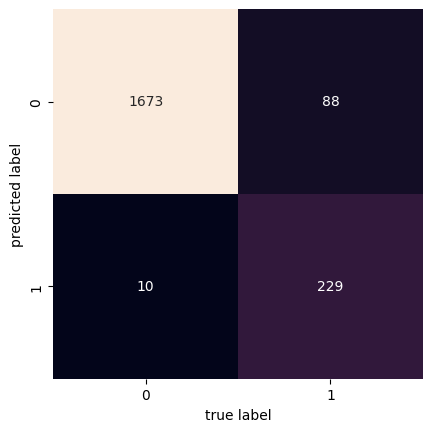

In [61]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

svc = SVC(kernel='linear',class_weight='balanced',random_state=42)

svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

#Accuracy Score
print('accuracy_score:',accuracy_score(svc_pred, y_test),"\n")

#Calssifiaction Report
print("Classifiaction Report:\n",classification_report(svc_pred, y_test))

#Cross Validation
cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5,return_train_score=True)
print('Cross validation train_score',cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'])

#heatmap confusion matrix
print("\nConfusion Matrix\n")
mat = confusion_matrix(svc_pred,y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 1.1 Random Forest

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1996
           1       0.02      1.00      0.03         4

    accuracy                           0.88      2000
   macro avg       0.51      0.94      0.49      2000
weighted avg       1.00      0.88      0.94      2000



<Axes: >

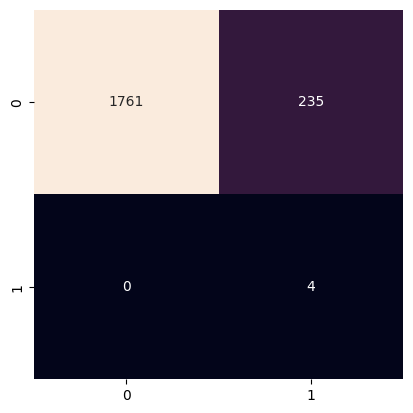

In [71]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

#Print classification report for this classifier:
print(metrics.classification_report(ypred, y_test))

#confusion matrix as heatmap
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


### 1.2 Feature Importance

In [94]:
def find_top_features(model, feature_names, n=5):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_features = [feature_names[i] for i in indices[:n]]
    top_importances = importances[indices][:n]
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(top_features, top_importances)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Top {} Features'.format(n))
    plt.xticks(rotation=45)
    
    # Add value labels to the bar chart
    for i, v in enumerate(top_importances):
        plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')
    
    plt.show()
    
    return top_features

model = RandomForestClassifier(random_state=42)
top_features = find_top_features(model, X_train.columns, n=5)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [95]:
def find_top_features(model, feature_names, n=5):
    if hasattr(model, 'coef_'):
        coefficients = model.coef_
        indices = np.argsort(np.abs(coefficients[0]))[::-1]
        top_features = [feature_names[i] for i in indices[:n]]
        return top_features

    else:
        print("Das Modell hat kein Attribut 'coef_'.")
        return []

model = SVC(kernel='linear', class_weight='balanced', random_state=42)
print(top_features)

['Customerlobby', 'Thisnext', 'Lithium', 'Kickapps', 'Mybloglog']
